In [80]:
#%matplotlib qt

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from knn import KNN
from sklearn import metrics

In [82]:
dory = cv2.imread("dory.png")
dory = cv2.resize(dory, (300, 185))
dory = cv2.cvtColor(dory, cv2.COLOR_BGR2RGB)

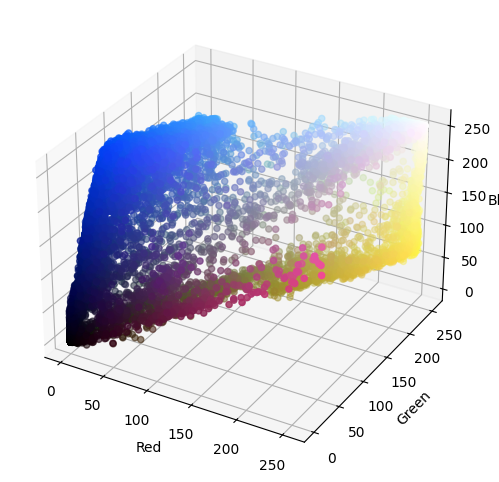

In [83]:
pixels_list_rgb = dory.reshape(-1,3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection= '3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb/ 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [84]:
dory_hsv = cv2.cvtColor(dory, cv2.COLOR_RGB2HSV)

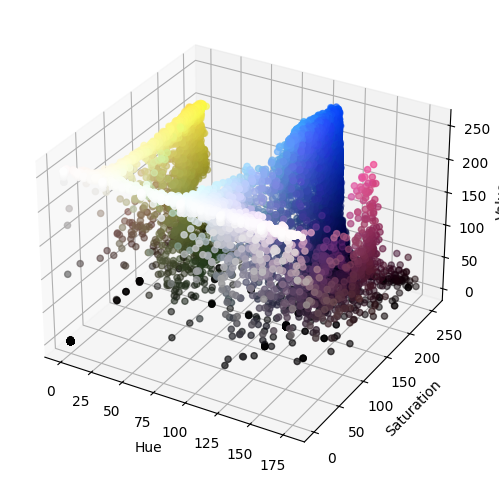

In [85]:
pixels_list_hsv = dory_hsv.reshape(-1,3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection= '3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb/ 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

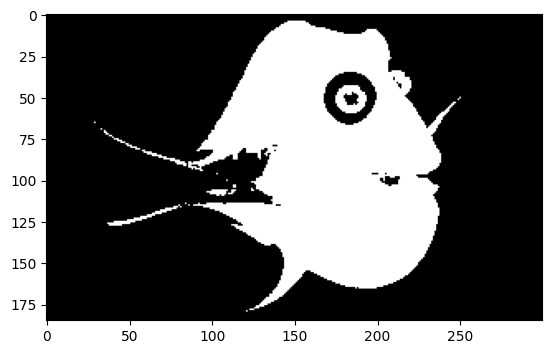

In [86]:
light_blue = (50, 100, 5)
dark_blue = (180, 255, 255)

mask_blue = cv2.inRange(dory_hsv, light_blue, dark_blue)
plt.imshow(mask_blue, cmap='gray')
plt.show()

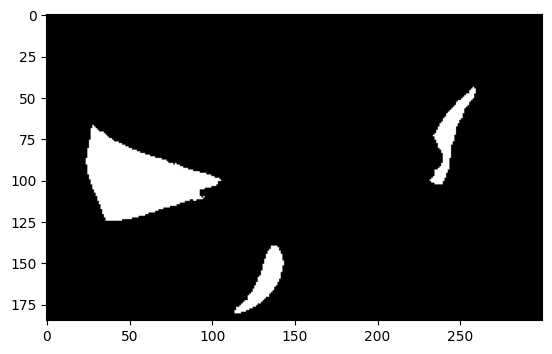

In [87]:
light_yellow = (15, 100, 40)
dark_yellow = (40, 255, 255)

mask_yellow = cv2.inRange(dory_hsv, light_yellow, dark_yellow)
plt.imshow(mask_yellow, cmap='gray')
plt.show()

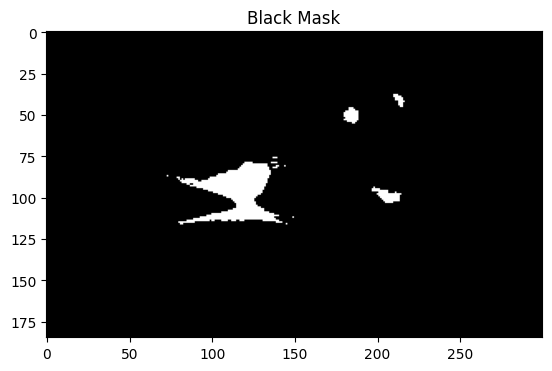

In [88]:
light_black = (0, 0, 0)  
dark_black = (185, 255, 8)   

mask_black = cv2.inRange(dory_hsv, light_black, dark_black)

plt.imshow(mask_black, cmap='gray')
plt.title('Black Mask')
plt.show()

In [89]:
final_mask = mask_blue + mask_yellow + mask_black


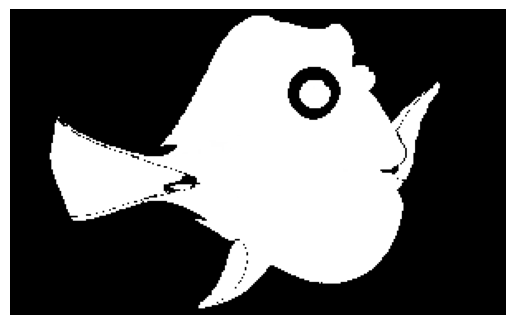

In [90]:
plt.axis('off')
plt.imshow(final_mask, cmap='gray')
plt.show()

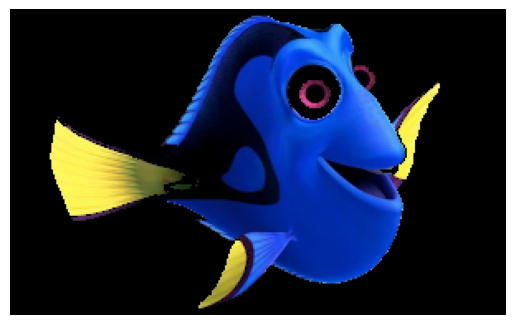

In [91]:
final_result= cv2.bitwise_and(dory, dory, mask=final_mask)
plt.axis('off')
plt.imshow(final_result)
plt.show()

In [92]:
X_train = pixels_list_hsv / 255
Y_train = final_mask.reshape(-1,) // 255

In [93]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [94]:
new_pixel = np.array([10, 200, 255]) / 255
knn.predict([new_pixel])

array([1], dtype=int64)

In [95]:
dashe_dory = cv2.imread('dory-300x185.jpg')
dashe_dory = cv2.resize(dashe_dory,(300, 185))
dashe_dory_rgb = cv2.cvtColor(dashe_dory, cv2.COLOR_BGR2RGB)
dashe_dory_hsv = cv2.cvtColor(dashe_dory_rgb, cv2.COLOR_RGB2HSV)

In [ ]:
from joblib import Parallel, delayed

X_test = dashe_dory_hsv.reshape(-1,3) / 255

def parallel_predict(knn_model, pixel):
    return knn_model.predict([pixel])

Y_pred = Parallel(n_jobs=-1)(delayed(parallel_predict)(knn, pixel) for pixel in X_test)
Y_pred = np.array(Y_pred)


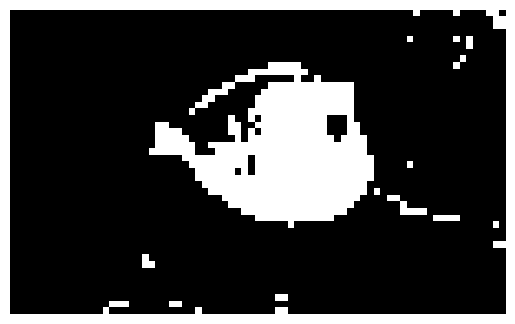

In [ ]:
out_put = Y_pred.reshape(dashe_dory.shape[:2])
plt.axis('off')
plt.imshow(out_put, cmap= 'gray')
plt.show()

In [ ]:
out_put = out_put.astype('uint8')

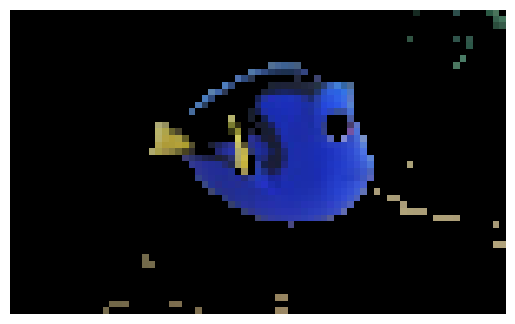

In [ ]:
final_result_1 = cv2.bitwise_and(dashe_dory_rgb, dashe_dory_rgb, mask=out_put)
plt.axis('off')
plt.imshow(final_result_1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

Y_test = final_mask.reshape(-1) // 255 
Y_pred = out_put.reshape(-1)  

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conff_matrix, display_labels=[0, 1])


fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


cm_display.plot(ax=ax, cmap='plasma')


plt.title('Confusion Matrix', fontsize=14, color='#e0e0e0')
plt.xlabel('Predicted Labels', fontsize=12, color='#e0e0e0')
plt.ylabel('Actual Labels', fontsize=12, color='#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.tight_layout()
plt.show()